In [1]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img1 = Image.open('input/1.jpg')
img2 = Image.open('input/2.jpg')
img3 = Image.open('input/3.jpg')

## Add noise

In [3]:
def sp_noise_gray(image, prob=0.03):
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                image[i,j] = 0
            elif rdn > thres:
                image[i,j] = 255
    return image

def sp_noise_color(image, prob=0.03, white=[255,255,255], black=[0,0,0]): 
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                image[i,j,:] = black
            elif rdn > thres:
                image[i,j,:] = white
    return image

In [4]:
img1_arr = (np.array(img1))[:,:,:3]
img1_arr_noise = sp_noise_color(img1_arr)
img1_noise = Image.fromarray(img1_arr_noise, mode='RGB')

img2_arr = (np.array(img2))[:,:,:3]
img2_arr_noise = sp_noise_color(img2_arr)
img2_noise = Image.fromarray(img2_arr_noise, mode='RGB')

img3_arr = (np.array(img3))[:,:,:3]
img3_arr_noise = sp_noise_color(img3_arr)
img3_noise = Image.fromarray(img3_arr_noise, mode='RGB')

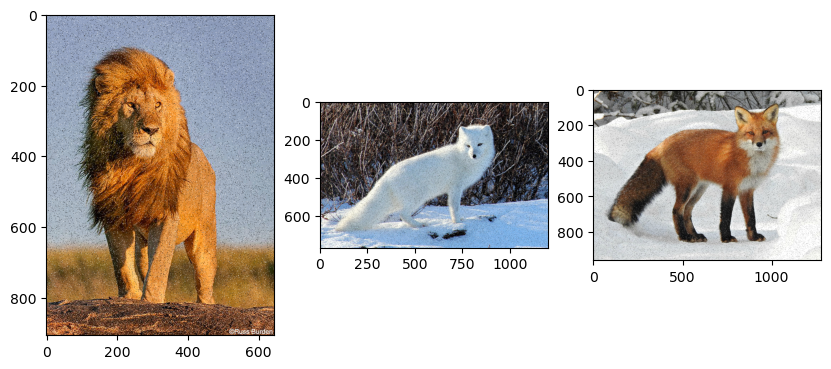

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1_noise, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(img2_noise, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(img3_noise)

In [6]:
def norm_noise_gray(image, mean=0, var=0.1, a=0.5): # gaussian noise to gray image

    sigma = var**0.5
    
    row,col= image.shape[:2]
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = a*image + (1-a)*gauss

    noisy = noisy-np.min(noisy)
    noisy = 255*(noisy/np.max(noisy))
    
    return noisy.astype(np.uint8)

def norm_noise_color(image, mean=0, var=0.1, a=0.5):  #gaussian noise to color image
    sigma = var**0.5
    
    row,col,ch= image.shape[:3]
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = a*image + (1-a)*gauss

    noisy = noisy-np.min(noisy)
    noisy = 255*(noisy/np.max(noisy))
    
    return noisy.astype(np.uint8)


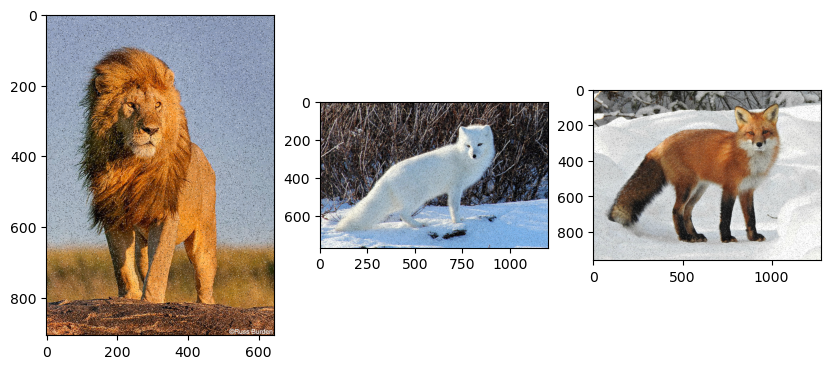

In [7]:
img1_arr_noise_g = norm_noise_color(img1_arr)
img1_noise_g = Image.fromarray(img1_arr_noise_g, mode='RGB')

img2_arr_noise_g = norm_noise_color(img2_arr)
img2_noise_g = Image.fromarray(img2_arr_noise_g, mode='RGB')

img3_arr_noise_g = norm_noise_color(img3_arr)
img3_noise_g = Image.fromarray(img3_arr_noise_g, mode='RGB')

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1_noise_g, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(img2_noise_g, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(img3_noise_g)

In [8]:
img1_noise_g_array = np.array(img1_noise_g)
img2_noise_g_array = np.array(img2_noise_g)
img3_noise_g_array = np.array(img3_noise_g)

## Denoise images

In [9]:
def box_avg(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'reflect')
    result_img = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            local_patch = padded_img[x:x+kernel_size, y:y+kernel_size]
            result_img[x, y] = np.mean(local_patch , axis=(0, 1))
    return result_img
box_avg_1 = box_avg(img1_noise_g_array)
box_avg_2 = box_avg(img2_noise_g_array)
box_avg_3 = box_avg(img1_noise_g_array)


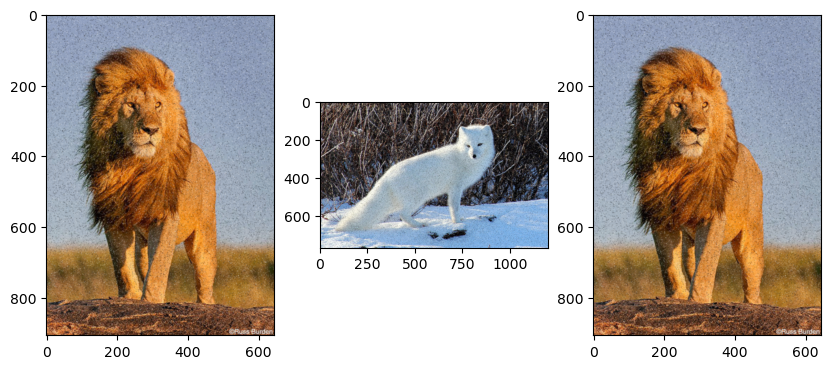

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(box_avg_1, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(box_avg_2, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(box_avg_3)

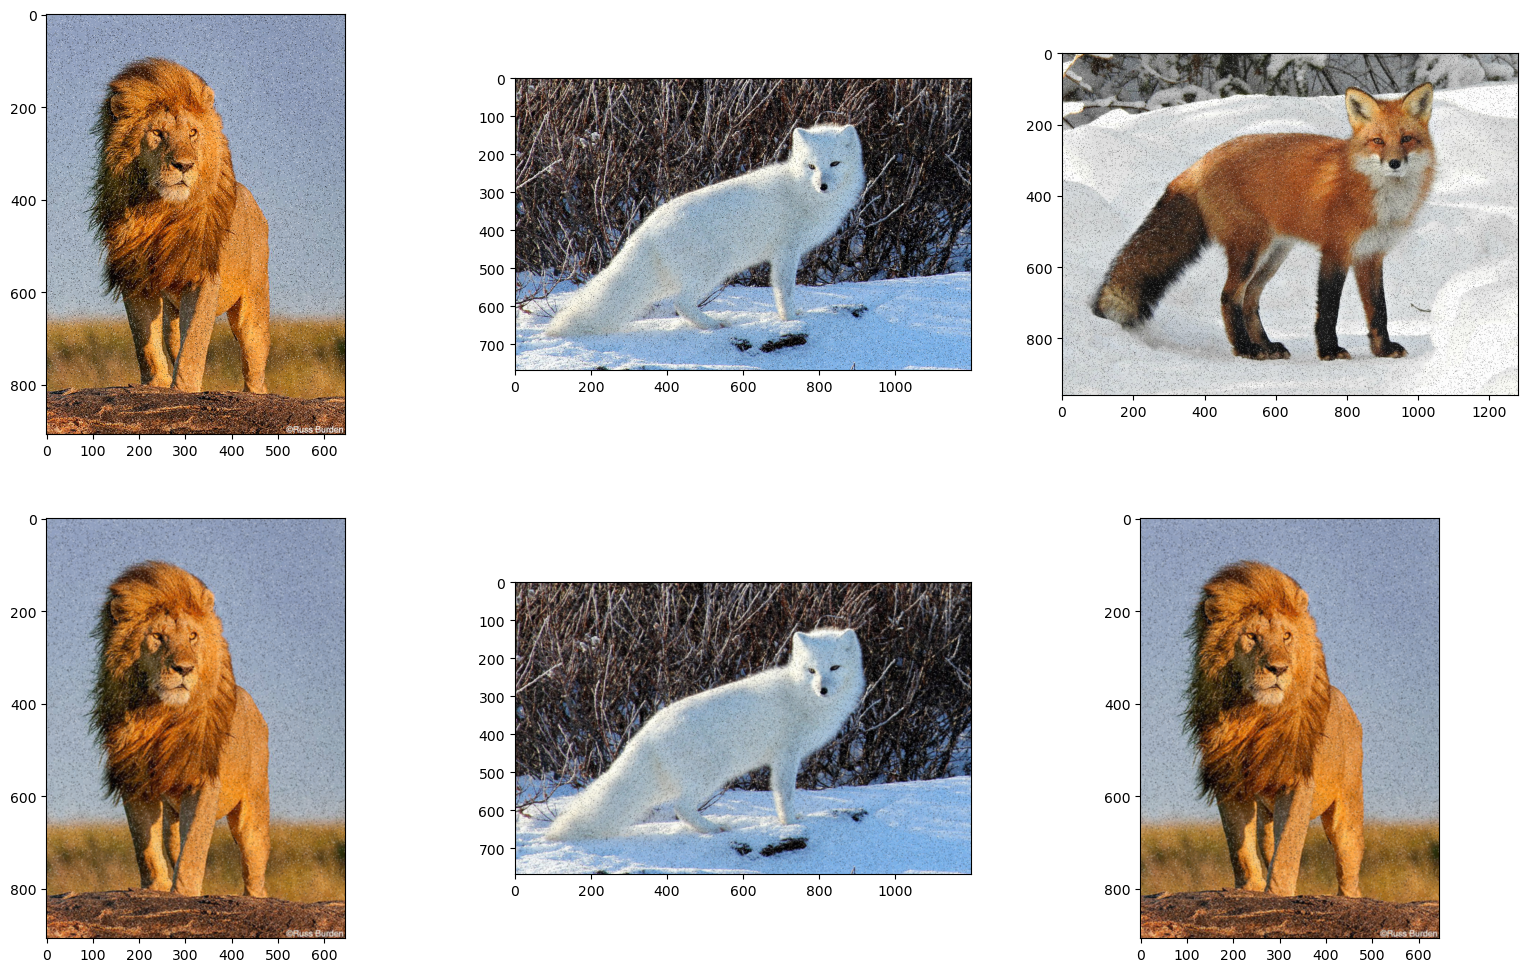

In [11]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(img1_noise_g_array, cmap="gray")

plt.subplot(2, 3, 2)
plt.imshow(img2_noise_g_array, cmap="gray")

plt.subplot(2, 3, 3)
plt.imshow(img3_noise_g_array, cmap="gray")

plt.subplot(2, 3, 4)
plt.imshow(box_avg_1, cmap="gray")

plt.subplot(2, 3, 5)
plt.imshow(box_avg_2, cmap="gray")

plt.subplot(2, 3, 6)
plt.imshow(box_avg_3, cmap="gray")

plt.show()

In [16]:
def median_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'reflect')
    result_img = np.zeros_like(image)
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            result_img[x, y] = np.median(padded_image[x:x+kernel_size, y:y+kernel_size], axis=(0, 1))
    return result_img

median_1 = median_filter(img1_noise_g_array)
median_2 = median_filter(img2_noise_g_array)
median_3 = median_filter(img3_noise_g_array)

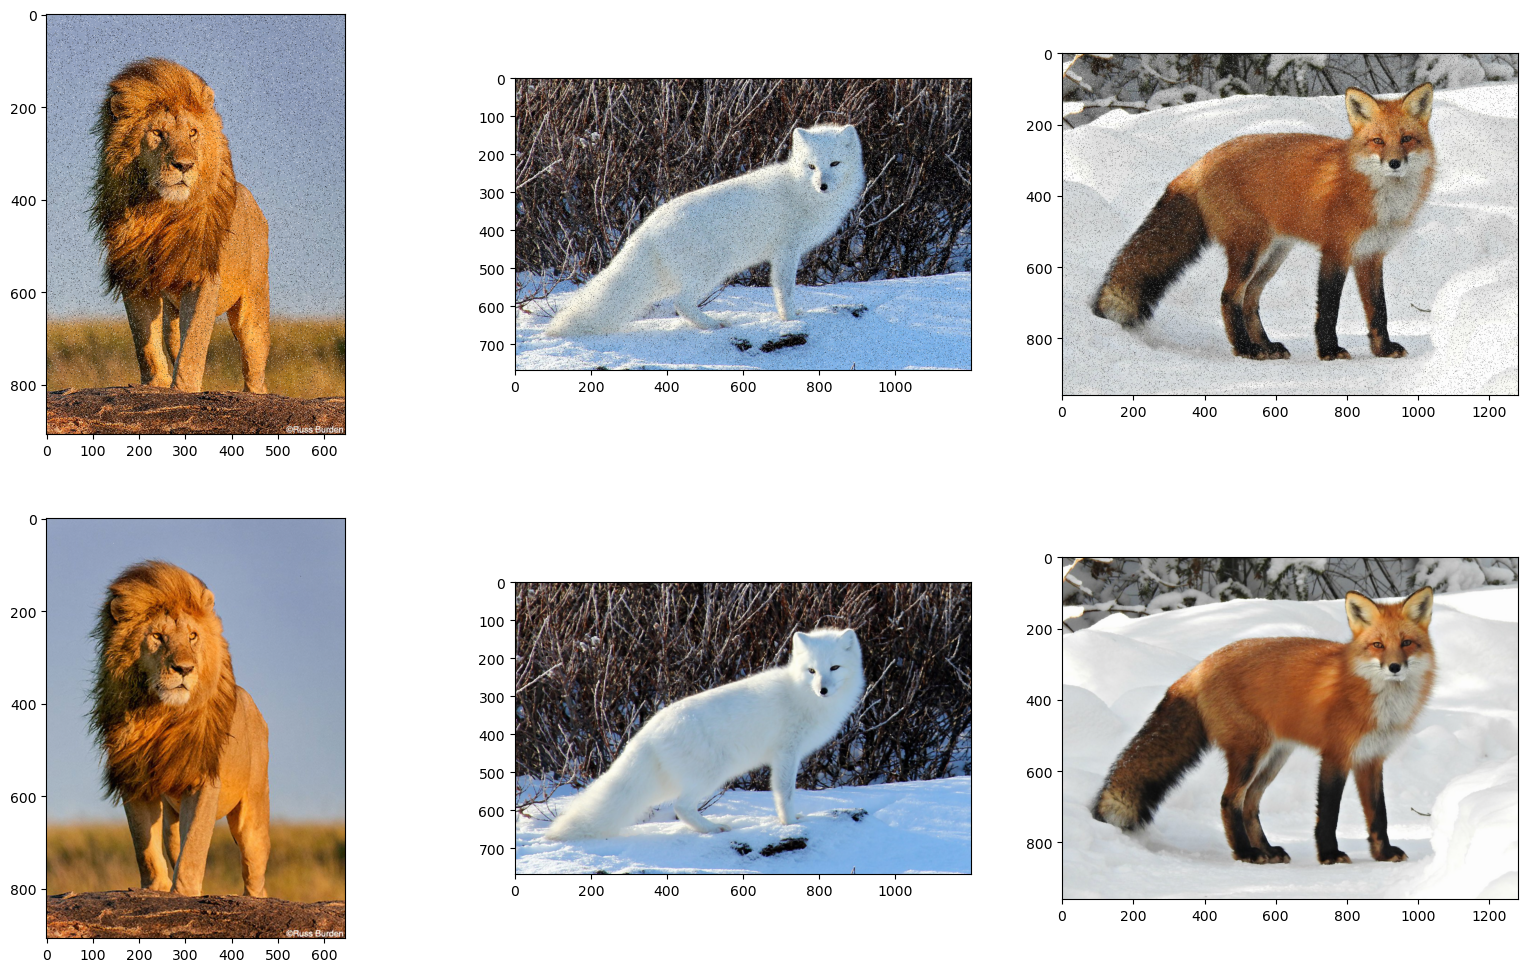

In [13]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(img1_noise_g_array)

plt.subplot(2, 3, 2)
plt.imshow(img2_noise_g_array)

plt.subplot(2, 3, 3)
plt.imshow(img3_noise_g_array)

plt.subplot(2, 3, 4)
plt.imshow(median_1)

plt.subplot(2, 3, 5)
plt.imshow(median_2)

plt.subplot(2, 3, 6)
plt.imshow(median_3)

plt.show()

In [14]:
def weighted_median(image, kernel_size=3):
    weights = np.array([[1, 2, 1], 
                        [2, 4, 2], 
                        [1, 2, 1]])
    scaling_factor = 10  
    weights = (weights / weights.sum() * scaling_factor).astype(int)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'reflect')
    result_img = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            local_patch  = padded_image[x:x+kernel_size, y:y+kernel_size]
            weighted_median = np.zeros(3)  
            for z in range(3): 
                weighted_values = np.repeat(local_patch [:, :, z].flatten(), weights.flatten())
                weighted_median[z] = np.median(weighted_values)
            result_img[x, y] = weighted_median
    return result_img.astype(image.dtype)

weighted_m_1 = weighted_median(img1_noise_g_array)
weighted_m_2 = weighted_median(img2_noise_g_array)
weighted_m_3 = weighted_median(img3_noise_g_array)

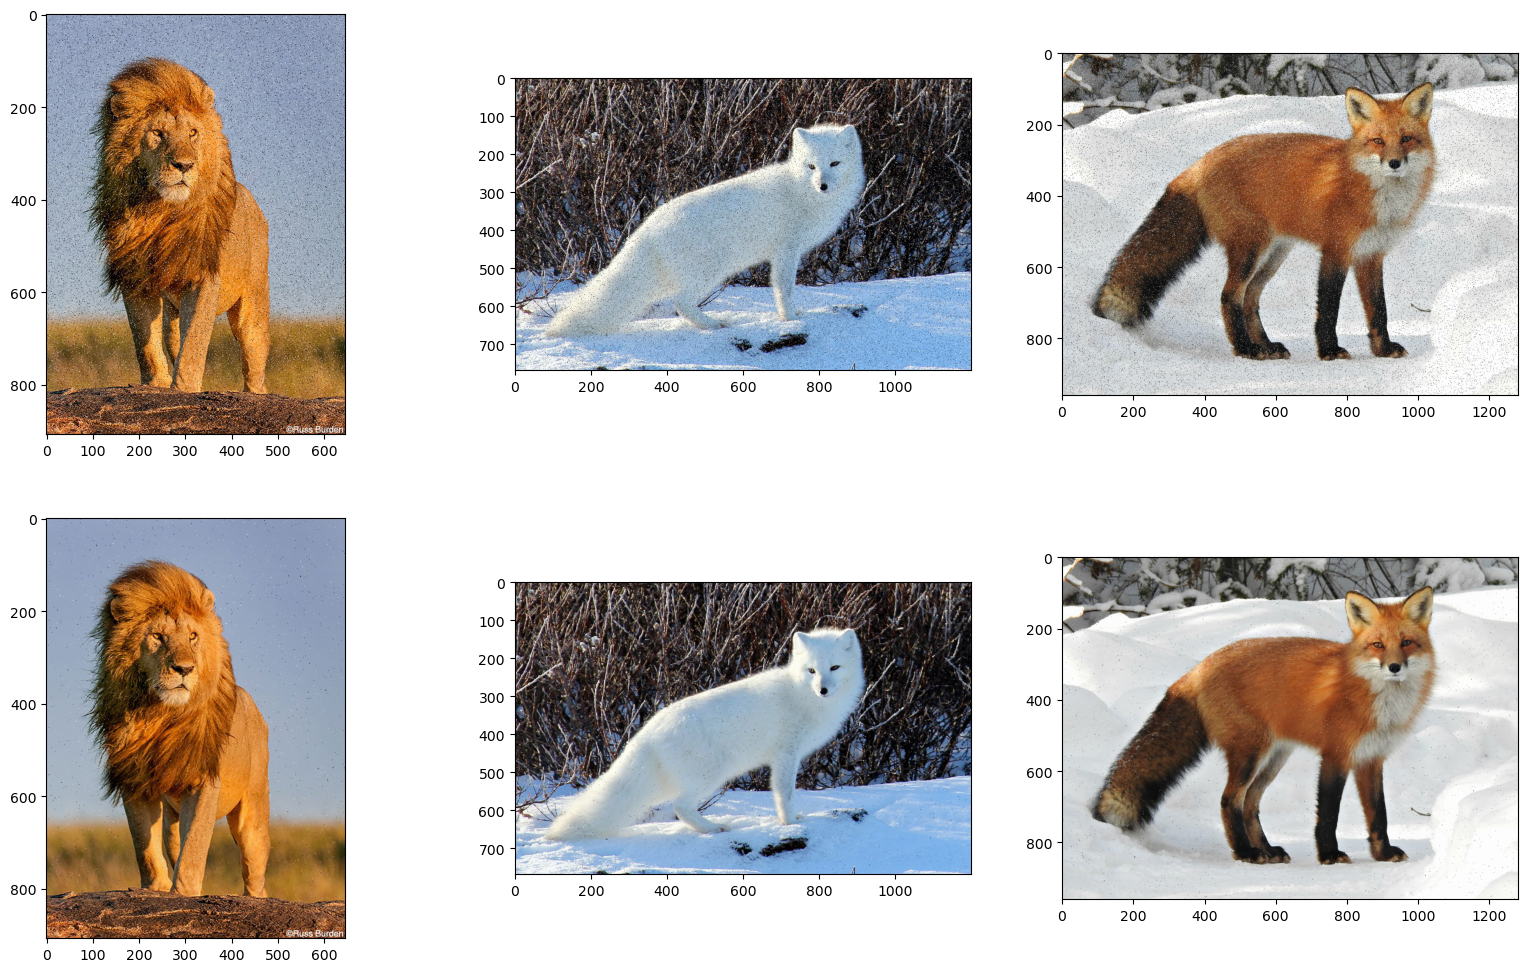

In [15]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(img1_noise_g_array)

plt.subplot(2, 3, 2)
plt.imshow(img2_noise_g_array)

plt.subplot(2, 3, 3)
plt.imshow(img3_noise_g_array)

plt.subplot(2, 3, 4)
plt.imshow(weighted_m_1)

plt.subplot(2, 3, 5)
plt.imshow(weighted_m_2)

plt.subplot(2, 3, 6)
plt.imshow(weighted_m_3)

plt.show()